In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer

In [2]:
from sklearn.decomposition import PCA

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [5]:
def ModelParamSearch(xgb, params, X_train, y_train):
    search = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, iid=False, cv=5)
    search.fit(X_train, y_train)
    print('\ngrid_scores')
    for score in search.grid_scores_:
        print(score)
    print('\nbest_params')
    print(search.best_params_)
    print('\nbest_score')
    print(search.best_score_)
    return search

In [6]:
X_train_df = pd.read_csv("../data/offline/X_train.csv", index_col=0)
y_train_df = pd.read_csv("../data/offline/y_train.csv", index_col=0)
X_test_df = pd.read_csv("../data/offline/X_test.csv", index_col=0)
combine_df = pd.concat([X_train_df, X_test_df])

In [35]:
def modelfit(regressor, feature_names, X_train, y_train, X_test, y_test):
    #Fit the algorithm on the data
    regressor.fit(X_train, y_train)

    #Predict training set:
    y_predictions = regressor.predict(X_test)
#     dtrain_predprob = alg.predict_proba(y_test)

    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % metrics.mean_squared_error(y_test, y_predictions))
    #print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))

    importance_df = pd.DataFrame(data=regressor.feature_importances_, index=feature_names)
    
    importance_df = importance_df.rename(columns={0:'contribution'})
    importance_df = importance_df.sort_values('contribution')
    
    importance_df.plot(kind='barh', title='Feature Importances',figsize=(7, 16))
    plt.ylabel('Feature Importance Score')
    plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df.values, y_train_df['SalePrice'].values, test_size=0.5, random_state=1729)


Model Report
RMSE : 0.02126


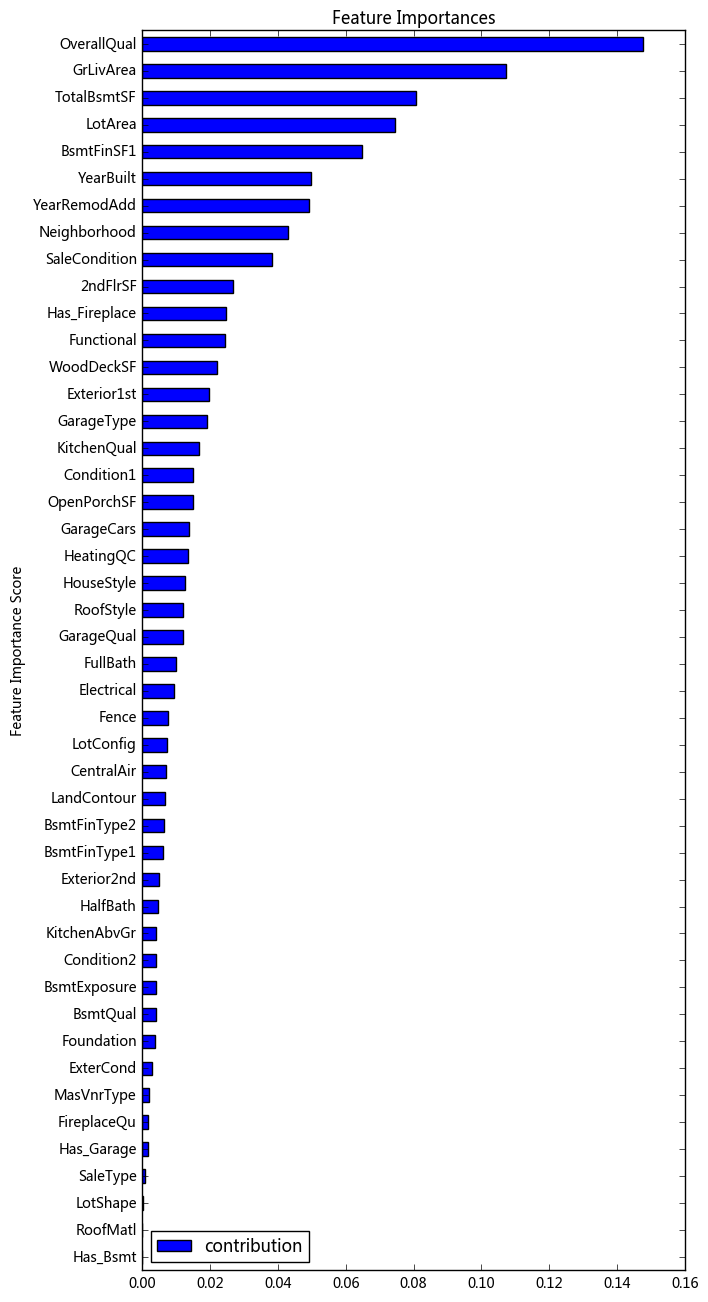

In [37]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.05, n_estimators=120,  
                                           min_samples_split=2, min_samples_leaf=2, max_depth=4)


modelfit(gbdt_regressor, X_train_df.columns, X_train, y_train, X_test, y_test)

In [38]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.05, n_estimators=120,  
                                           min_samples_split=2, min_samples_leaf=2, max_depth=4)

params1 = {
 'max_depth':np.array(range(3,10,2)),
 'min_samples_split':np.array(range(2,6,2))
}
search = ModelParamSearch(gbdt_regressor, params1, X_train, y_train)


grid_scores
mean: 0.88667, std: 0.01791, params: {'min_samples_split': 2, 'max_depth': 3}
mean: 0.88662, std: 0.01804, params: {'min_samples_split': 4, 'max_depth': 3}
mean: 0.88067, std: 0.01748, params: {'min_samples_split': 2, 'max_depth': 5}
mean: 0.88080, std: 0.01783, params: {'min_samples_split': 4, 'max_depth': 5}
mean: 0.86410, std: 0.01892, params: {'min_samples_split': 2, 'max_depth': 7}
mean: 0.86226, std: 0.01859, params: {'min_samples_split': 4, 'max_depth': 7}
mean: 0.83941, std: 0.02324, params: {'min_samples_split': 2, 'max_depth': 9}
mean: 0.84100, std: 0.02376, params: {'min_samples_split': 4, 'max_depth': 9}

best_params
{'min_samples_split': 2, 'max_depth': 3}

best_score
0.886670246103


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [41]:
params2 = {
 'max_depth':[3, 4],
 'min_samples_split':[2, 3],
 'min_samples_leaf':[2, 3]
}
search2 = ModelParamSearch(gbdt_regressor, params2, X_train, y_train)


grid_scores
mean: 0.88681, std: 0.01799, params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3}
mean: 0.88695, std: 0.01810, params: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 3}
mean: 0.88836, std: 0.01526, params: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3}
mean: 0.88835, std: 0.01532, params: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 3}
mean: 0.88614, std: 0.01819, params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4}
mean: 0.88634, std: 0.01745, params: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4}
mean: 0.88470, std: 0.02005, params: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 4}
mean: 0.88509, std: 0.01969, params: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 4}

best_params
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3}

best_score
0.88836190158


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [45]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.05, n_estimators=120,  
                                           min_samples_split=2, min_samples_leaf=3, max_depth=3)

params3 = {
 'subsample':[i/10.0 for i in range(1,10)],
}
search3 = ModelParamSearch(gbdt_regressor, params3, X_train, y_train)




grid_scores
mean: 0.89368, std: 0.01313, params: {'subsample': 0.1}
mean: 0.89105, std: 0.01316, params: {'subsample': 0.2}
mean: 0.89523, std: 0.01441, params: {'subsample': 0.3}
mean: 0.89752, std: 0.01209, params: {'subsample': 0.4}
mean: 0.89725, std: 0.01126, params: {'subsample': 0.5}
mean: 0.89750, std: 0.01391, params: {'subsample': 0.6}
mean: 0.89347, std: 0.01546, params: {'subsample': 0.7}
mean: 0.89089, std: 0.01366, params: {'subsample': 0.8}
mean: 0.88880, std: 0.01663, params: {'subsample': 0.9}

best_params
{'subsample': 0.4}

best_score
0.897515680018


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [48]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.05, n_estimators=120, subsample=0.4,
                                           min_samples_split=2, min_samples_leaf=3, max_depth=3)

params4 = {
 'learning_rate':[0.02, 0.01, 0.005],
 'n_estimators':[800 , 1000, 5000]
}
search4 = ModelParamSearch(gbdt_regressor, params4, X_train, y_train)


grid_scores
mean: 0.90688, std: 0.01310, params: {'n_estimators': 800, 'learning_rate': 0.02}
mean: 0.90738, std: 0.01501, params: {'n_estimators': 1000, 'learning_rate': 0.02}
mean: 0.90263, std: 0.01663, params: {'n_estimators': 5000, 'learning_rate': 0.02}
mean: 0.90247, std: 0.01337, params: {'n_estimators': 800, 'learning_rate': 0.01}
mean: 0.90573, std: 0.01313, params: {'n_estimators': 1000, 'learning_rate': 0.01}
mean: 0.90596, std: 0.01467, params: {'n_estimators': 5000, 'learning_rate': 0.01}
mean: 0.89187, std: 0.00866, params: {'n_estimators': 800, 'learning_rate': 0.005}
mean: 0.89818, std: 0.01049, params: {'n_estimators': 1000, 'learning_rate': 0.005}
mean: 0.90755, std: 0.01343, params: {'n_estimators': 5000, 'learning_rate': 0.005}

best_params
{'n_estimators': 5000, 'learning_rate': 0.005}

best_score
0.907550888855


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [87]:

gbdt_regressor = GradientBoostingRegressor(learning_rate=0.005, n_estimators=5000, subsample=0.4,
                                           min_samples_split=2, min_samples_leaf=3, max_depth=3, random_state=56)

In [89]:
gbdt_regressor.fit(X_train, y_train)
gbdt_regressor.score(X_test, y_test)

0.88245608361254813

In [90]:
0.88229079804431088
0.88267362133320759

0.8826736213332076


Model Report
RMSE : 0.01864


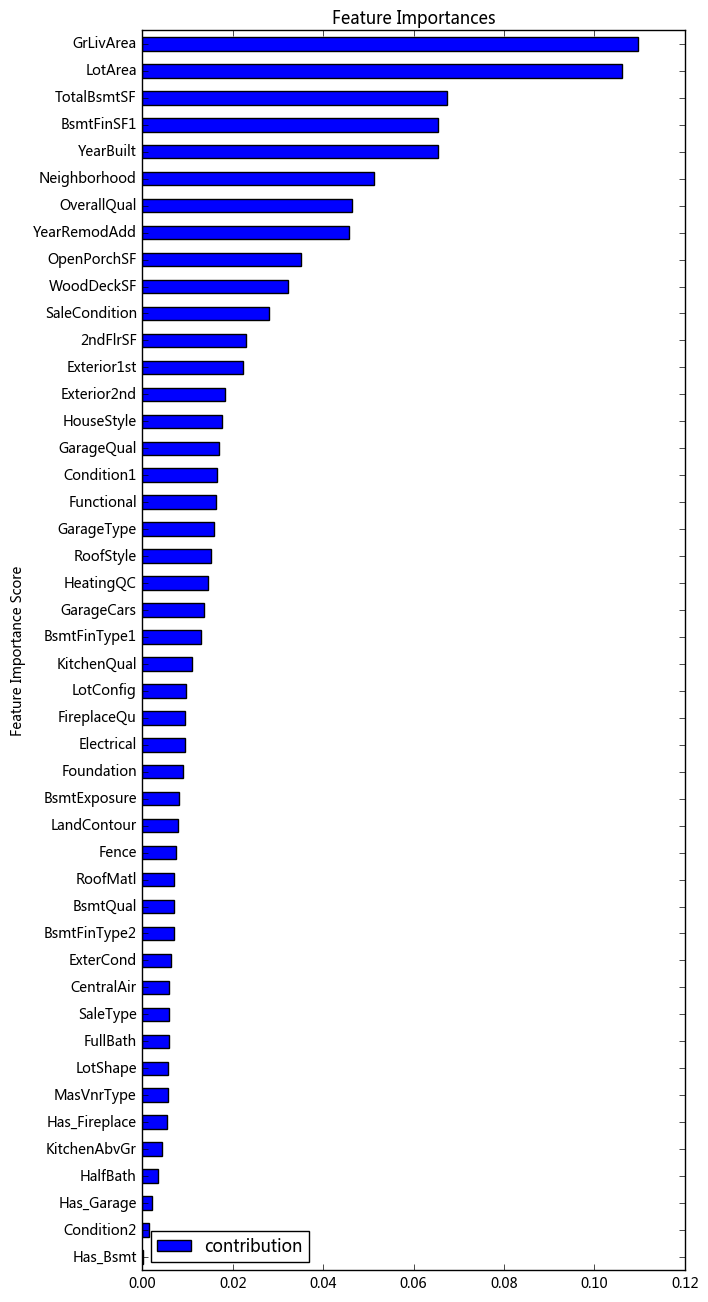

In [91]:
modelfit(gbdt_regressor, X_train_df.columns, X_train, y_train, X_test, y_test)

In [98]:
gbdt_regressor.fit(X_train_df.values, y_train_df['SalePrice'].values)
y_predict = gbdt_regressor.predict(X_test_df.values)

In [99]:
y_predict_df = pd.DataFrame(np.expm1(y_predict), index=X_test_df.index)

In [100]:
y_predict_df = y_predict_df.rename(columns={0:'SalePrice'})

In [101]:
y_predict_df

,SalePrice
Id,
1461,122000.408604
1462,165067.636447
1463,185392.947045
1464,190675.571141
1465,190014.595658
1466,174940.171987
1467,172852.963411
1468,168217.907113
1469,185537.495308


In [102]:
y_predict_df.to_csv('../data/online/predict3.csv', header = True, index=True)